# ANALYSIS OF DIAMOND DATASET

This analysis of data is done by - Nikita V Shah

The diamond dataset is selected from kaggle.com

The dataset consists of the following columns

Id - Diamond identification number provided by Brillant Earth

url - URL for diamond details page

shape - External geometric appearance of a diamond

price - Price in U.S. dollars

carat - Unit of measurement used to describe the weight of a diamond

cut - Facets, symmetry, and reflective qualities of a diamond

color - Natural color or lacl of color visible within a diamond, based on the GIA grade scale

clarity -Visibility of natural microscopic inclusions and imperfections within a diamond

report - Diamond certificate or grading report provided by an independent gemology lab

type - Natural or lab created diamonds

date_fetched - Date the data was fetched

# importing all required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
data=pd.read_csv("C:/Users/nikis/Downloads/diamonds_dataset.csv/diamonds_dataset.csv")

In [3]:
data.head()

,id,url,shape,price,carat,cut,color,clarity,report,type,date_fetched
0,10086429,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Very Good,J,SI2,GIA,natural,2020-11-29 12-26 PM
1,10016334,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.31,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
2,9947216,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,VS2,GIA,natural,2020-11-29 12-26 PM
3,10083437,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Ideal,I,SI2,GIA,natural,2020-11-29 12-26 PM
4,9946136,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM


# DATA CLEANING

# Determining the shape of the data

In [4]:
data.columns

Index(['id', 'url', 'shape', 'price', 'carat', 'cut', 'color', 'clarity',
       'report', 'type', 'date_fetched'],
      dtype='object')

# Droping the unecessary columns from the dataset for better analysis. we will drop the 'url' volumn from the data

In [5]:
data.drop("url",axis=1,inplace=True)

In [6]:
data.columns

Index(['id', 'shape', 'price', 'carat', 'cut', 'color', 'clarity', 'report',
       'type', 'date_fetched'],
      dtype='object')

# checking the datatype of the columns in the data

In [7]:
data.dtypes

id                int64
shape            object
price             int64
carat           float64
cut              object
color            object
clarity          object
report           object
type             object
date_fetched     object
dtype: object

# Converting the date_fetched column which is in object format into date format

In [8]:
data['price']=data['price']*81.993

In [9]:
data.head()

,id,shape,price,carat,cut,color,clarity,report,type,date_fetched
0,10086429,Round,32797.2,0.30,Very Good,J,SI2,GIA,natural,2020-11-29 12-26 PM
1,10016334,Emerald,32797.2,0.31,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
2,9947216,Emerald,32797.2,0.30,Ideal,I,VS2,GIA,natural,2020-11-29 12-26 PM
3,10083437,Round,32797.2,0.30,Ideal,I,SI2,GIA,natural,2020-11-29 12-26 PM
4,9946136,Emerald,32797.2,0.30,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM


# renaming some columns in the data

In [10]:
data.rename(columns={'price':'price(in inr)'},inplace=True)


In [11]:
data.columns

Index(['id', 'shape', 'price(in inr)', 'carat', 'cut', 'color', 'clarity',
       'report', 'type', 'date_fetched'],
      dtype='object')

# checking the description of the data

In [12]:
data.describe()

,id,price(in inr),carat
count,1.193070e+05,1.193070e+05,119307.000000
mean,9.905507e+06,2.694981e+05,0.884169
std,2.373824e+05,7.473412e+05,0.671141
min,4.367730e+05,2.213811e+04,0.250000
25%,9.854352e+06,7.379370e+04,0.400000
50%,9.978096e+06,1.451276e+05,0.700000
75%,1.005433e+07,2.861556e+05,1.100000
max,1.009225e+07,1.105856e+08,15.320000


# checking if the data contains any null values

In [13]:
data.isnull().sum()

id               0
shape            0
price(in inr)    0
carat            0
cut              0
color            0
clarity          0
report           0
type             0
date_fetched     0
dtype: int64

This indidcates that the data does not conatin any null value

In [14]:
data.duplicated().sum()

0

This shows that the data does not contain any duplicated value

# creating a new column in the dataset which displays the color of the diamond in more detail

In [15]:
data['color'].unique()

array(['J', 'I', 'E', 'F', 'G', 'H', 'D'], dtype=object)

In [16]:
data.loc[data.color=='J','color_detail']='near colorless,slight yellow'
data.loc[data.color=='I','color_detail']='near colorless,noticeable yellow'
data.loc[data.color=='E','color_detail']='virtually colorless'
data.loc[data.color=='F','color_detail']='colorless,minimal amount of color'
data.loc[data.color=='G','color_detail']='colorless,slight trace of color when compared'
data.loc[data.color=='H','color_detail']='colorless,slight tinge of color unless compared'
data.loc[data.color=='D','color_detail']='colorless,rare,pure'

# creating a new column in the dataset which displays the clarity of the diamond in more detail

In [17]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS2', 'VVS1', 'VS1', 'VVS2', 'IF', 'FL'],
      dtype=object)

In [18]:
data.loc[data.clarity=='SI2','clarity_detail']='Slightly Included Flaws'
data.loc[data.clarity=='SI1','clarity_detail']='Slightly Included Flaws'
data.loc[data.clarity=='VS2','clarity_detail']='very Slightly Included Flaws'
data.loc[data.clarity=='VVS1','clarity_detail']='very Slightly Included Flaws'
data.loc[data.clarity=='VS1','clarity_detail']='very,very slightly Included Flaws'
data.loc[data.clarity=='VVS2','clarity_detail']='very,very slightly Included Flaws'
data.loc[data.clarity=='IF','clarity_detail']='Internally Flawless'
data.loc[data.clarity=='FL','clarity_detail']='Flawless,rare,highly valued'

In [19]:
data.head()

,id,shape,price(in inr),carat,cut,color,clarity,report,type,date_fetched,color_detail,clarity_detail
0,10086429,Round,32797.2,0.30,Very Good,J,SI2,GIA,natural,2020-11-29 12-26 PM,"near colorless,slight yellow",Slightly Included Flaws
1,10016334,Emerald,32797.2,0.31,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM,"near colorless,noticeable yellow",Slightly Included Flaws
2,9947216,Emerald,32797.2,0.30,Ideal,I,VS2,GIA,natural,2020-11-29 12-26 PM,"near colorless,noticeable yellow",very Slightly Included Flaws
3,10083437,Round,32797.2,0.30,Ideal,I,SI2,GIA,natural,2020-11-29 12-26 PM,"near colorless,noticeable yellow",Slightly Included Flaws
4,9946136,Emerald,32797.2,0.30,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM,"near colorless,noticeable yellow",Slightly Included Flaws


# creating a new dataframes that gives proper description of unique clarity and color of diamonds

In [20]:
diamond_color=data[['color','color_detail']]

In [21]:
diamond_color.drop_duplicates()

,color,color_detail
0,J,"near colorless,slight yellow"
1,I,"near colorless,noticeable yellow"
5,E,virtually colorless
20,F,"colorless,minimal amount of color"
21,G,"colorless,slight trace of color when compared"
45,H,"colorless,slight tinge of color unless compared"
75,D,"colorless,rare,pure"


In [22]:
diamond_clarity=data[['clarity','clarity_detail']]

In [23]:
diamond_clarity.drop_duplicates()

,clarity,clarity_detail
0,SI2,Slightly Included Flaws
1,SI1,Slightly Included Flaws
2,VS2,very Slightly Included Flaws
9,VVS1,very Slightly Included Flaws
19,VS1,"very,very slightly Included Flaws"
152,VVS2,"very,very slightly Included Flaws"
310,IF,Internally Flawless
1890,FL,"Flawless,rare,highly valued"


# EXPLORATORY DATA ANALYSIS

In [24]:
data.columns

Index(['id', 'shape', 'price(in inr)', 'carat', 'cut', 'color', 'clarity',
       'report', 'type', 'date_fetched', 'color_detail', 'clarity_detail'],
      dtype='object')

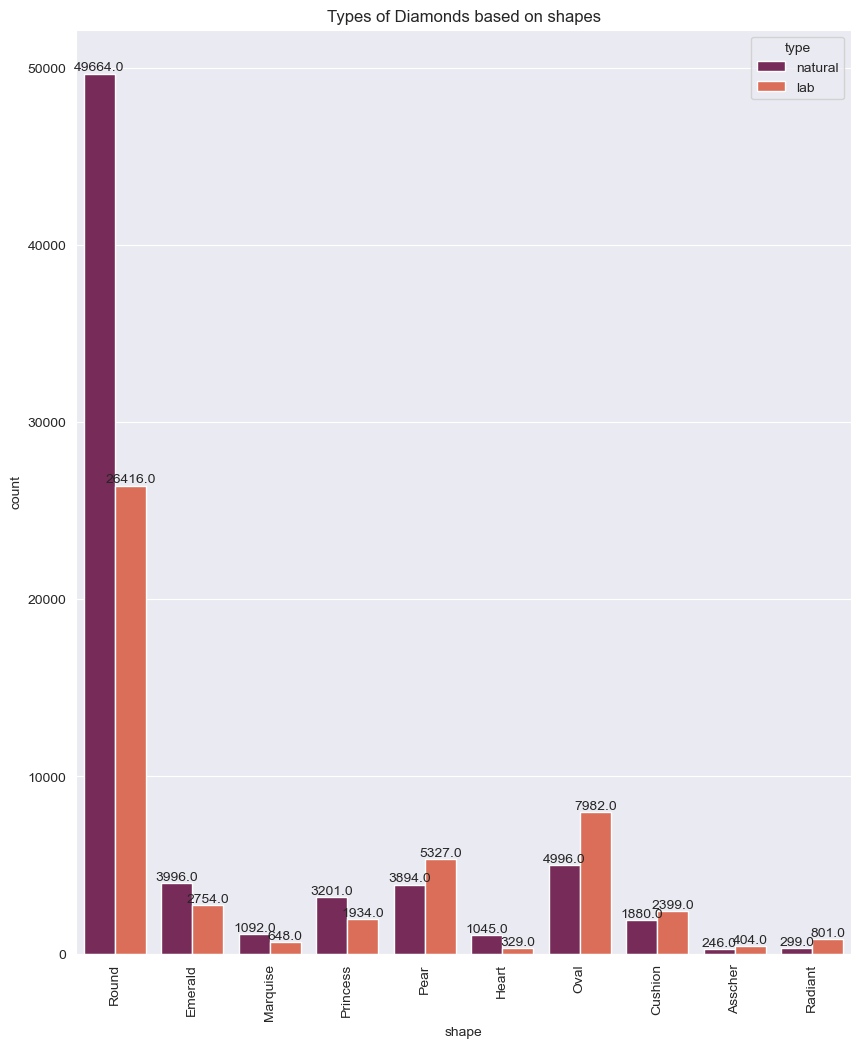

In [25]:
plt.figure(figsize=(10,12))
ax=sns.countplot(x='shape',data=data,hue='type',palette='rocket')
plt.title('Types of Diamonds based on shapes')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height()}', ha='center', va='bottom')

from this chart , we can say that more of natural diamonds exist in round shape followed by oval and least number of natural diamonds appear in Asscher shape

In other way we can say that more number of laboratory diamonds occur in round shape followed by oval shape and least number of laboratory diamonds exist in heart shape

# creating a countplot to see the count of diamonds based on their clarity and shape

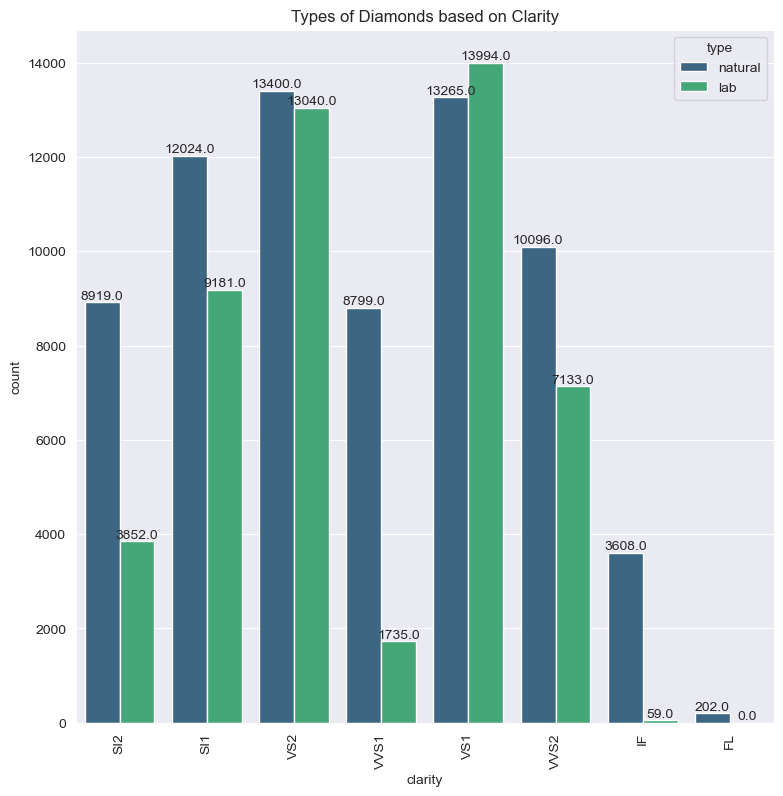

In [26]:
plt.figure(figsize=(9,9))
ax=sns.countplot(x='clarity',data=data,hue='type',palette='viridis')
plt.title('Types of Diamonds based on Clarity')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height()}', ha='center', va='bottom')

From this graph we can say that most of the naturally existing diamonds posses VS2 type of clarity and least posses FL type of clarity

In other hand we can infer that most of the laboratory created diamonds posses VS1 type of clarity and none of them posses FL type of clarity

# Creating a scatter plot to seee if there is any relation between the carat and price of the diamond

Text(0, 0.5, 'Price of Diamonds')

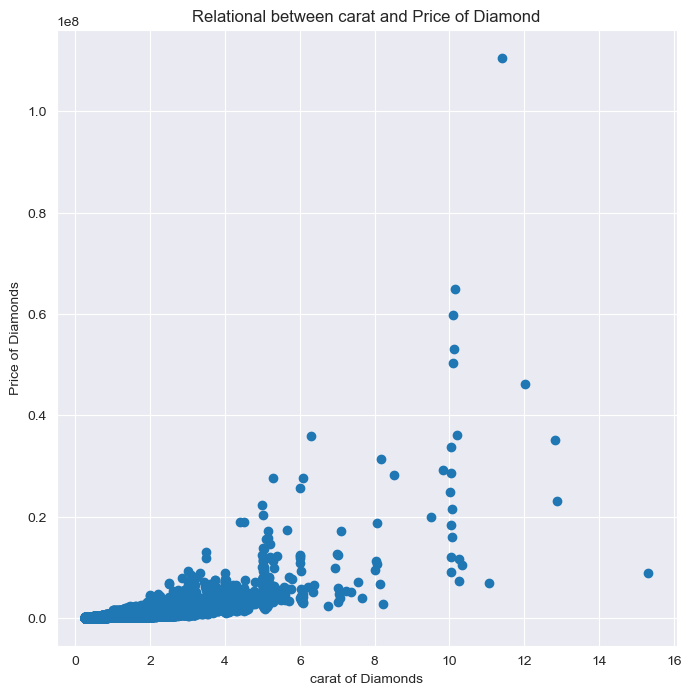

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(x='carat',y='price(in inr)',data=data)
plt.title('Relational between carat and Price of Diamond')
plt.xlabel('carat of Diamonds')
plt.ylabel('Price of Diamonds')

From this scatter chart we can say that with the increase in carat the price also increases but there are few exception.

# Creating  a scatter plot to see if there is any relation between the cut of diamond and price of the diamond

Text(0, 0.5, 'Price of Diamond')

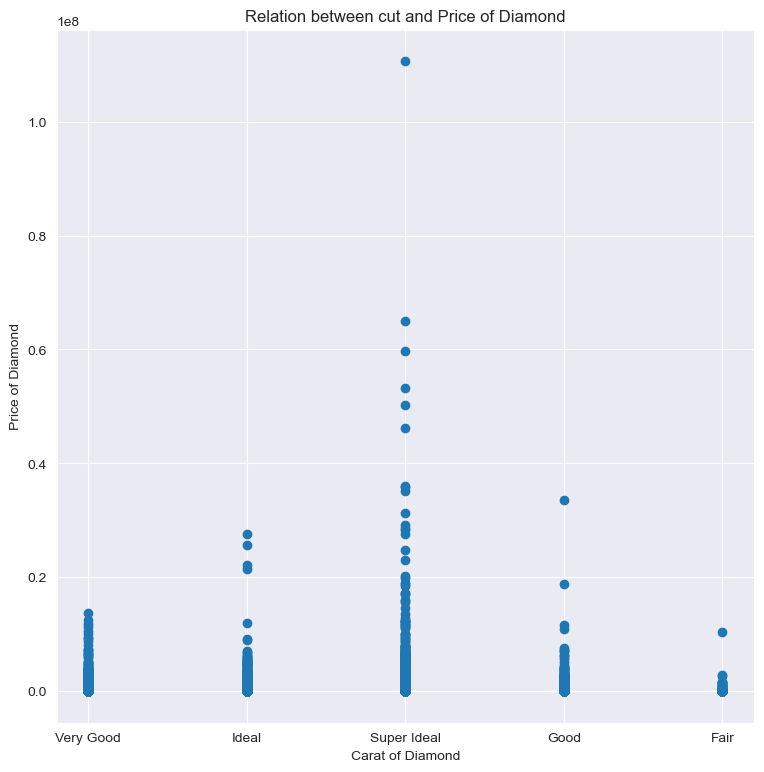

In [28]:
plt.figure(figsize=(9,9))
plt.scatter(x='cut',y='price(in inr)',data=data)
plt.title('Relation between cut and Price of Diamond')
plt.xlabel('Carat of Diamond')
plt.ylabel('Price of Diamond')

From this scatter chart we can say that super ideal cut have more price value and fair cut have less price value

# creating a scatter plot to see if there is any relation between the color of diamond and price of the diamond

Text(0, 0.5, 'Price of Diamonds')

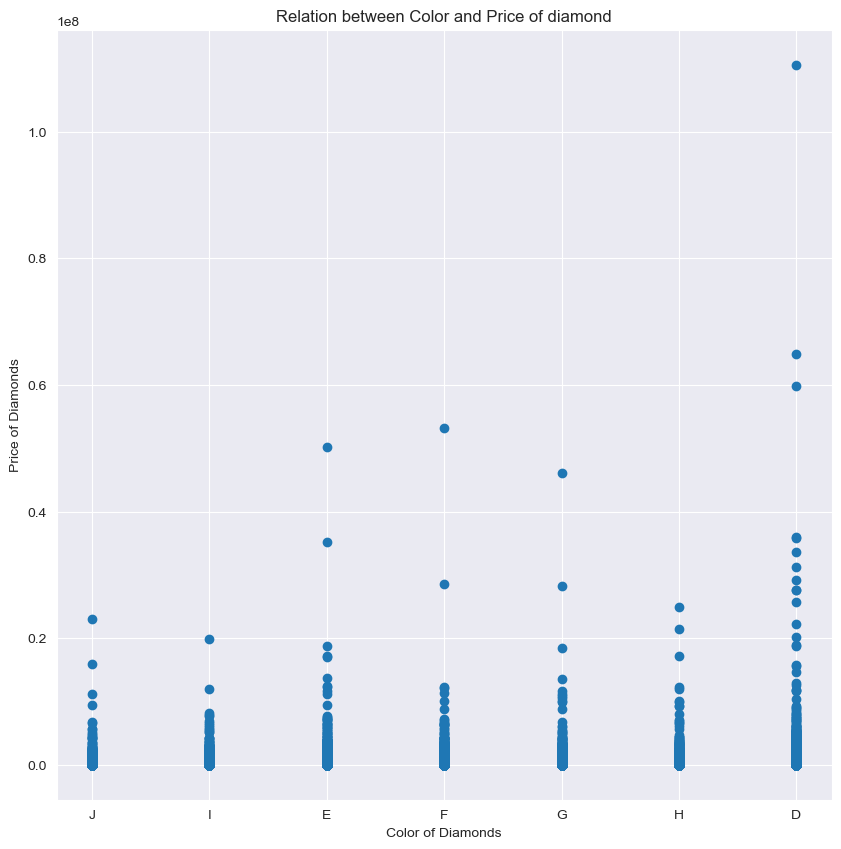

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(x='color',y='price(in inr)',data=data)
plt.title('Relation between Color and Price of diamond')
plt.xlabel('Color of Diamonds')
plt.ylabel('Price of Diamonds')

Frome this scatter chart we can say that high prices are for D color diamonds(colourless,rare) and less prices are for I color diamonds(noticeable yellow)

# creating a countplot for the number of reports given to the diamonds by different laboratories

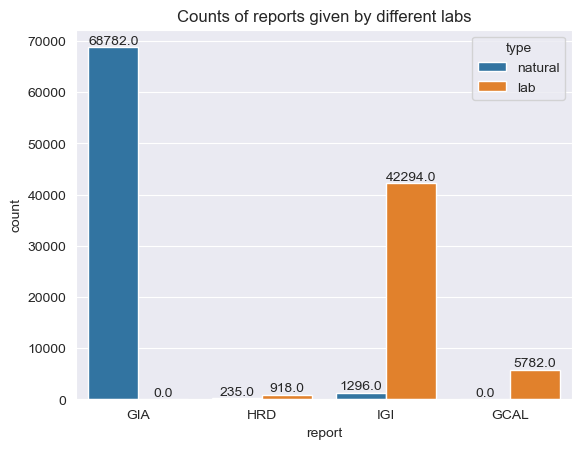

In [30]:
ax=sns.countplot(x='report',data=data,hue='type')
plt.title('Counts of reports given by different labs')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height()}', ha='center', va='bottom')

From this we can say that the most of the report for natural diamonds are given by GIA(Gemological Institute of American) and most of the laboratory diamond reports are given by IGI(International Gemological Institute)

# PREDICITION USING LINEAR MODEL

'type','color','cut' - Independent variable , 'price' - Dependent variable

The columns above are in object format so i have converted it into int data type by the mapping method of python.

In [31]:
data['type']=data['type'].map({'natural':1, 'lab':2})

In [32]:
data['color']=data['color'].map({'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7})

In [33]:
data['cut']=data['cut'].map({'Super Ideal':1, 'Ideal':2, 'Very Good':3, 'Good':4, 'Fair':5})

In [34]:
data.columns

Index(['id', 'shape', 'price(in inr)', 'carat', 'cut', 'color', 'clarity',
       'report', 'type', 'date_fetched', 'color_detail', 'clarity_detail'],
      dtype='object')

In [35]:
x=data[['carat','cut','color']]

In [36]:
y=data['price(in inr)']

In [37]:
model=LinearRegression()

Splitting the data into training set and testing set

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [39]:
x_train.shape,x_test.shape

((95445, 3), (23862, 3))

Training the model

In [40]:
model.fit(x_train,y_train)

LinearRegression()

prediction using model

In [41]:
prediction=model.predict(x_test)

In [42]:
model_prediction=pd.DataFrame({'Actual':y_test,'Predicted_value':prediction})

In [43]:
model_prediction.head(10)

,Actual,Predicted_value
74297,31977.27,-6523.624275
69241,1518510.36,613435.526052
27612,100031.46,-105984.860630
46748,207442.29,209260.483203
99536,192683.55,587122.208426
42714,182024.46,95562.733554
73315,30337.41,69004.911871
34605,127089.15,95588.193117
7519,58215.03,-21251.009643
35635,133648.59,105038.012015


Our model does not give good predictions.